<a href="https://colab.research.google.com/github/AlSamirShuvo/Diavetes_Prediction_using_ML-299-/blob/main/Diabetes_Prediction_System_(XGBoost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [ ]:
!pip install shap

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix, roc_curve, roc_auc_score


Uploading CSV file


In [ ]:
url = 'https://raw.githubusercontent.com/AlSamirShuvo/Diavetes_Prediction_using_ML-299-/refs/heads/main/diabetes_prediction_dataset.csv'
Diabetes_dataset = pd.read_csv(url)

In [ ]:
Diabetes_dataset.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [ ]:
viz = Diabetes_dataset.copy()

In [ ]:
Diabetes_dataset.shape

(100000, 9)

In [ ]:
print(" Summary Statistics:")
print(Diabetes_dataset.describe())

 Summary Statistics:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         

In [ ]:
print(" Diabetes Class Distribution (in %):")
print(Diabetes_dataset['diabetes'].value_counts(normalize=True) * 100)
print(Diabetes_dataset['diabetes'].value_counts())

 Diabetes Class Distribution (in %):
diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64
diabetes
0    91500
1     8500
Name: count, dtype: int64


In [ ]:
# Value counts for categorical variables
print(" Gender Distribution:")
print(Diabetes_dataset['gender'].value_counts())

 Gender Distribution:
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


In [ ]:
print(" Smoking History Distribution:")
print(Diabetes_dataset['smoking_history'].value_counts())

 Smoking History Distribution:
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


Checking missing values



In [ ]:
print(Diabetes_dataset.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
Diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Separating data and lebel


In [ ]:
train, test = train_test_split(Diabetes_dataset, test_size = 0.2)

In [ ]:
train.head(15)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
63305,Female,47.00,0,0,not current,27.29,6.0,140,0
29527,Female,19.00,0,0,No Info,20.44,5.0,140,0
51912,Female,80.00,0,0,No Info,25.66,6.6,130,0
73410,Male,70.00,1,0,former,30.83,6.5,85,0
24162,Male,6.00,0,0,No Info,16.19,6.1,90,0
69147,Female,44.00,0,0,never,24.85,5.8,159,0
97555,Female,74.00,0,0,not current,36.60,5.0,130,0
40457,Female,50.00,1,0,never,50.11,6.1,145,0
6365,Male,77.00,0,0,never,33.10,5.8,160,1
78946,Male,32.00,0,0,never,28.15,5.0,85,0


In [ ]:
test.head(15)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
5754,Female,58.00,0,0,ever,37.87,6.5,140,0
91799,Female,59.00,0,0,never,30.88,3.5,80,0
64167,Male,80.00,0,0,No Info,27.32,5.8,160,0
8149,Female,62.00,0,0,never,34.24,8.2,300,1
25424,Female,61.00,0,0,never,30.49,5.7,160,0
11628,Female,54.00,0,0,ever,19.91,6.1,126,0
57668,Male,79.00,0,0,never,27.32,8.8,300,1
99329,Female,38.00,0,0,No Info,32.00,6.0,140,0
8109,Female,0.48,0,0,No Info,14.71,5.0,200,0
36237,Female,51.00,1,0,current,27.90,3.5,85,0


Encoding String (Categorical) Columns in X

In [ ]:
le = LabelEncoder()

# Detect categorical columns (like gender, smoking_history, etc.)
cat_cols = train.select_dtypes(include='object').columns
print("Categorical columns:", cat_cols)

# Apply Label Encoding to each categorical column
for col in cat_cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])


Categorical columns: Index(['gender', 'smoking_history'], dtype='object')


In [ ]:
train.head(15)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
63305,0,47.00,0,0,5,27.29,6.0,140,0
29527,0,19.00,0,0,0,20.44,5.0,140,0
51912,0,80.00,0,0,0,25.66,6.6,130,0
73410,1,70.00,1,0,3,30.83,6.5,85,0
24162,1,6.00,0,0,0,16.19,6.1,90,0
69147,0,44.00,0,0,4,24.85,5.8,159,0
97555,0,74.00,0,0,5,36.60,5.0,130,0
40457,0,50.00,1,0,4,50.11,6.1,145,0
6365,1,77.00,0,0,4,33.10,5.8,160,1
78946,1,32.00,0,0,4,28.15,5.0,85,0


In [ ]:
test.head(15)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
5754,0,58.00,0,0,2,37.87,6.5,140,0
91799,0,59.00,0,0,4,30.88,3.5,80,0
64167,1,80.00,0,0,0,27.32,5.8,160,0
8149,0,62.00,0,0,4,34.24,8.2,300,1
25424,0,61.00,0,0,4,30.49,5.7,160,0
11628,0,54.00,0,0,2,19.91,6.1,126,0
57668,1,79.00,0,0,4,27.32,8.8,300,1
99329,0,38.00,0,0,0,32.00,6.0,140,0
8109,0,0.48,0,0,0,14.71,5.0,200,0
36237,0,51.00,1,0,1,27.90,3.5,85,0


Gender

Male-> 1

Female-> 0



Smoking History

No info-> 0

Current-> 1

ever-> 2

Former-> 3

Never-> 4

Not current-> 5

In [ ]:
x_train = train.drop('diabetes', axis=1)
x_test = test.drop('diabetes', axis=1)


In [ ]:
y_train = train['diabetes']
y_test = test['diabetes']

XGBoost Model

In [ ]:
XGB_model = XGBClassifier(eval_metric='logloss')

In [ ]:
XGB_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred = XGB_model.predict(x_test)


In [ ]:
result = XGB_model.predict([[1, 35, 1, 0, 1, 24, 5, 80]])
print(result)

[0]


Evaluating the model


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
accuracy = log_loss(y_test, y_pred)
print("log loss:", accuracy)


Accuracy: 0.9703
log loss: 1.07049650565678


In [ ]:
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))


              precision    recall  f1-score   support

Non-Diabetic       0.97      1.00      0.98     18311
    Diabetic       0.95      0.69      0.80      1689

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



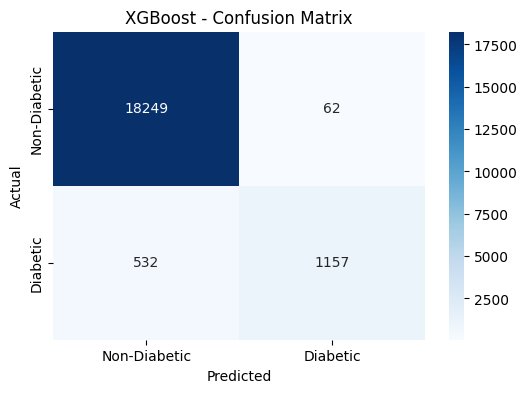

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Visualisation**

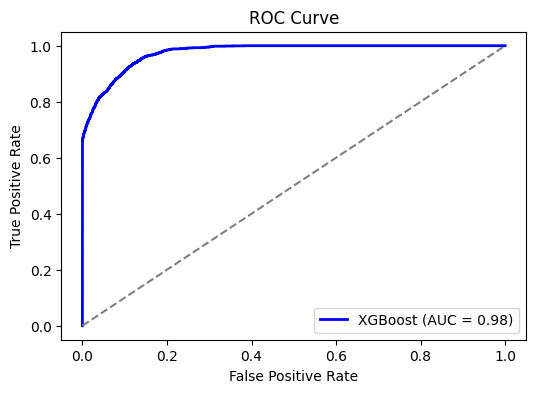

In [ ]:
y_probs = XGB_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



**SHAP**

In [ ]:
import shap

In [ ]:
# Initialize SHAP explainer for XGBoost
explainer = shap.Explainer(XGB_model)

In [ ]:
# Calculate SHAP values for the test set
shap_values = explainer(x_test)

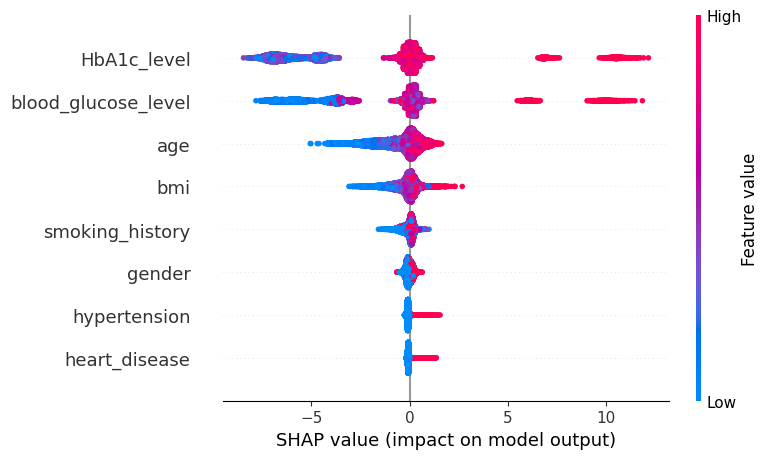

In [ ]:
# Summary plot - shows global feature importance
shap.summary_plot(shap_values, x_test)

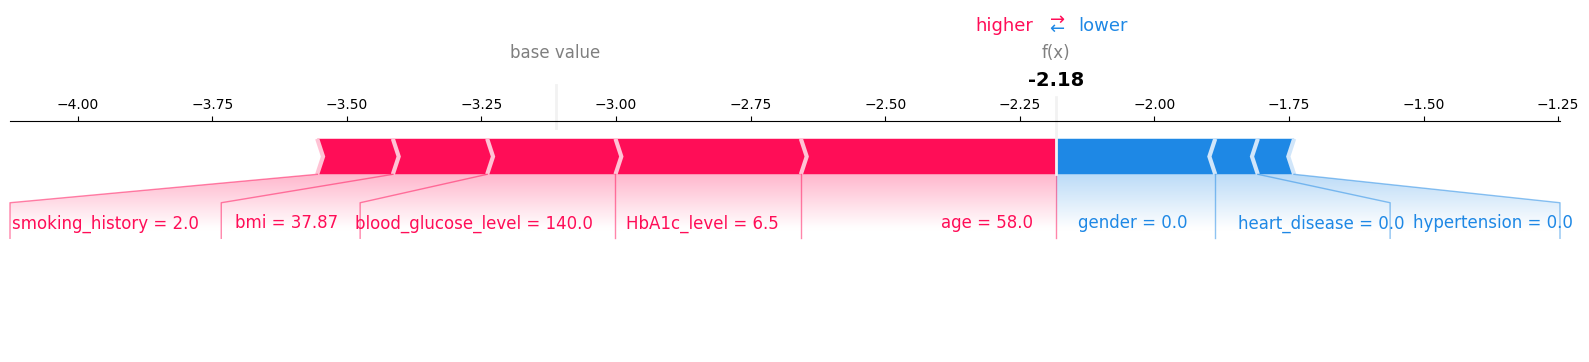

In [ ]:
shap.initjs()

# Select an instance to explain (e.g., the first sample)
instance = x_test.iloc[0]

# Display the force plot
shap.force_plot(
    explainer.expected_value,
    shap_values[0].values,
    instance,
    matplotlib=True
)

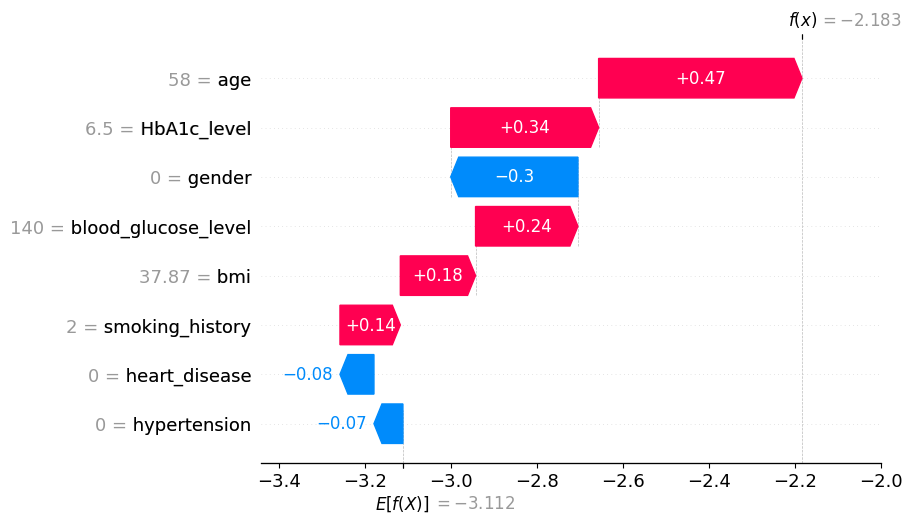

In [ ]:
shap.plots.waterfall(shap_values[0])


In [ ]:
user_input0= [[0, 33, 0, 0, 5, 60, 7.2, 180]]
user_input1= [[0, 44, 0, 0, 4, 19.31, 6.5, 200]]
user_input2= [[1, 71, 0, 0, 4, 27, 8.2, 200]]
user_input3= [[0, 40, 0, 0, 4, 31, 6.6, 159]]
user_input= [[0, 49, 1, 0, 5, 37, 8.8, 155]]

In [ ]:
result = XGB_model.predict(user_input)
print(result)

[1]


In [ ]:
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
user_df = pd.DataFrame(user_input, columns=columns)

In [ ]:
explainer = shap.TreeExplainer(XGB_model)
shap_values = explainer(user_df)


In [ ]:
shap.initjs()
shap.force_plot(
    base_value=shap_values.base_values[0],
    shap_values=shap_values.values[0],
    features=user_df.iloc[0],
    feature_names=user_df.columns
)


In [ ]:
shap_vals = shap_values.values[0]

# Features to exclude from advice
excluded_features = {'gender'}

advice_map = {
    'glucose': "Maintain a balanced diet with low glycemic index foods.",
    'blood_glucose_level': "Maintain a balanced diet with low glycemic index foods to stabilize blood sugar levels.",
    'bmi': "Incorporate regular physical activity and a nutritious diet to reach a healthy weight range.",
    'smoking_history': "Avoid all forms of tobacco to reduce insulin resistance and cardiovascular risk.",
    'age': "Stay proactive with routine checkups and manage lifestyle factors as age-related risks increase.",
    'HbA1c_level': "Monitor HbA1c regularly and follow prescribed treatment plans.",
    'hypertension': "Limit sodium intake, manage stress, and follow medical guidance.",
    'heart_disease': "Adopt a heart-healthy diet and consult a cardiologist regularly.",
    # 'gender' intentionally omitted
}

# --- Decision based on Prediction ---
if result == 1:
    print("Prediction: Diabetic\n")

    # Filter out excluded features and get top 4 contributors
    top_features = sorted(
        [(col, val) for col, val in zip(columns, shap_vals) if col not in excluded_features],key=lambda x: x[1],reverse=True)[:3]

    print("Top risk-contributing features:")
    for feature, value in top_features:
        if value > 0:
            print(f"- {feature} ({value:.3f})")

    print("\nSuggested Actions:")
    for feature, value in top_features:
        if value > 0:
            print(f"- {feature}: {advice_map.get(feature, 'No advice available.')}")
else:
    print("Prediction: Non-Diabetic\n")

    # Future risk features (positive SHAP values, excluding gender)
    future_risk_features = [(col, val) for col, val in zip(columns, shap_vals)
                            if val > 0 and col not in excluded_features]
    top_3_future_risks = sorted(future_risk_features, key=lambda x: x[1], reverse=True)[:3]

    if top_3_future_risks:
        print("\nFeatures to Watch Out For (Future Risk Contributors):")
        for feature, value in top_3_future_risks:
            print(f"- {feature} ({value:.3f})")

        print("\nSuggested Prevention Tips:")
        for feature, value in top_3_future_risks:
            print(f"- {feature}: {advice_map.get(feature, 'No advice available.')}")
    else:
        print("\nNo strong future risk contributors detected — keep up the good lifestyle!")


Prediction: Diabetic

Top risk-contributing features:
- HbA1c_level (10.867)
- bmi (0.393)
- hypertension (0.388)

Suggested Actions:
- HbA1c_level: Monitor HbA1c regularly and follow prescribed treatment plans.
- bmi: Incorporate regular physical activity and a nutritious diet to reach a healthy weight range.
- hypertension: Limit sodium intake, manage stress, and follow medical guidance.
